In [1]:
# Import data science packages
import pandas as pd
import numpy as np

# Import visualization and geoanalytics packages
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import box

In [4]:
# Read file into dataframe
df = pd.read_csv("sc.csv")

In [5]:
df.head()

Unnamed: 0  Issue Date            Location Violation Description  \
0           0  2019-09-17    309 WINDWARD AVE  NO PARK/STREET CLEAN   
1           1  2019-09-17       934 84TH ST W  NO PARK/STREET CLEAN   
2           2  2019-09-17   2601 MONMOUTH AVE  NO PARK/STREET CLEAN   
3           3  2019-09-17      615 HAMPTON DR  NO PARK/STREET CLEAN   
4           4  2019-09-17  1346 MCCADDEN PL N  NO PARK/STREET CLEAN   

  Day of Week   Latitude   Longitude      Time  
0     Tuesday  33.989412 -118.469024  12:05:00  
1     Tuesday  33.962435 -118.290126  08:53:00  
2     Tuesday  34.032120 -118.284957  08:33:00  
3     Tuesday  33.994284 -118.474775  10:15:00  
4     Tuesday  34.095217 -118.337472  10:07:00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76138 entries, 0 to 76137
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             76138 non-null  int64  
 1   Issue Date             76138 non-null  object 
 2   Location               76138 non-null  object 
 3   Violation Description  76138 non-null  object 
 4   Day of Week            76138 non-null  object 
 5   Latitude               76138 non-null  float64
 6   Longitude              76138 non-null  float64
 7   Time                   76138 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [7]:

# Turn Lat,Lon into tuple
'''df['Coordinates'] = (list(zip(df.Latitude, df.Longitude)))
# Remove index
del df['Unnamed: 0']
# Rename columns
df.columns =  ['Issue_Date', 'Issue_time', 'Location', 'Violation_Description', 'Day_of_Week',
       'Latitude', 'Longitude', 'Coordinates']
# Time padding function
def time_padding(time):
    time = str(int(time))
    return '0'*(4-len(time)) + time
# Apply padding to Issue_time
df['Issue_time'] = df['Issue_time'].apply(time_padding)
# Creating combined Datetime column
df['Datetime'] = pd.to_datetime(df['Issue_Date'] + ' ' + df['Issue_time'], format='%Y-%m-%d %H%M')
# Filter for street cleaning violations'''


"df['Coordinates'] = (list(zip(df.Latitude, df.Longitude)))\n# Remove index\ndel df['Unnamed: 0']\n# Rename columns\ndf.columns =  ['Issue_Date', 'Issue_time', 'Location', 'Violation_Description', 'Day_of_Week',\n       'Latitude', 'Longitude', 'Coordinates']\n# Time padding function\ndef time_padding(time):\n    time = str(int(time))\n    return '0'*(4-len(time)) + time\n# Apply padding to Issue_time\ndf['Issue_time'] = df['Issue_time'].apply(time_padding)\n# Creating combined Datetime column\ndf['Datetime'] = pd.to_datetime(df['Issue_Date'] + ' ' + df['Issue_time'], format='%Y-%m-%d %H%M')\n# Filter for street cleaning violations"

In [8]:

# Turn Lat,Lon into tuple
df['Coordinates'] = (list(zip(df.Latitude, df.Longitude)))
# Remove index
del df['Unnamed: 0']
# Rename columns
df.columns =  ['Issue_Date','Location', 'Violation_Description', 'Day_of_Week',
       'Latitude', 'Longitude','Issue_time', 'Coordinates']
df['Issue_time'] = pd.to_datetime(df['Issue_time'])

In [9]:
df = df[df['Violation_Description'] == 'NO PARK/STREET CLEAN']

In [10]:
df.head()

Issue_Date            Location Violation_Description Day_of_Week  \
0  2019-09-17    309 WINDWARD AVE  NO PARK/STREET CLEAN     Tuesday   
1  2019-09-17       934 84TH ST W  NO PARK/STREET CLEAN     Tuesday   
2  2019-09-17   2601 MONMOUTH AVE  NO PARK/STREET CLEAN     Tuesday   
3  2019-09-17      615 HAMPTON DR  NO PARK/STREET CLEAN     Tuesday   
4  2019-09-17  1346 MCCADDEN PL N  NO PARK/STREET CLEAN     Tuesday   

    Latitude   Longitude          Issue_time  \
0  33.989412 -118.469024 2020-04-26 12:05:00   
1  33.962435 -118.290126 2020-04-26 08:53:00   
2  34.032120 -118.284957 2020-04-26 08:33:00   
3  33.994284 -118.474775 2020-04-26 10:15:00   
4  34.095217 -118.337472 2020-04-26 10:07:00   

                                 Coordinates  
0   (33.98941160114757, -118.46902420083059)  
1  (33.962435471869014, -118.29012557695592)  
2   (34.03211999723245, -118.28495700168608)  
3    (33.99428400168339, -118.4747749980143)  
4   (34.09521697951698, -118.33747210209486)

In [11]:
# Turn citation coordinates into Geopandas geometry column
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [12]:
geo_df.columns

Index(['Issue_Date', 'Location', 'Violation_Description', 'Day_of_Week',
       'Latitude', 'Longitude', 'Issue_time', 'Coordinates', 'geometry'],
      dtype='object')

In [13]:
geo_df['Hour'] = geo_df.Issue_time.apply(lambda x: x.hour)

In [14]:
geo_df.head(1)

Issue_Date          Location Violation_Description Day_of_Week   Latitude  \
0  2019-09-17  309 WINDWARD AVE  NO PARK/STREET CLEAN     Tuesday  33.989412   

    Longitude          Issue_time                               Coordinates  \
0 -118.469024 2020-04-26 12:05:00  (33.98941160114757, -118.46902420083059)   

                      geometry  Hour  
0  POINT (-118.46902 33.98941)    12

In [15]:

geo_df['Time']= geo_df.Issue_time.apply(lambda x: str(x.time()).replace(':', '')[:4]).astype(int)

In [16]:
geo_df.head(1)

Issue_Date          Location Violation_Description Day_of_Week   Latitude  \
0  2019-09-17  309 WINDWARD AVE  NO PARK/STREET CLEAN     Tuesday  33.989412   

    Longitude          Issue_time                               Coordinates  \
0 -118.469024 2020-04-26 12:05:00  (33.98941160114757, -118.46902420083059)   

                      geometry  Hour  Time  
0  POINT (-118.46902 33.98941)    12  1205

In [17]:
geo_df['Day_of_Week'].unique()

array(['Tuesday', 'Monday', 'Friday', 'Thursday', 'Wednesday', 'Sunday',
       'Saturday'], dtype=object)

In [18]:
geo_df_mo = geo_df[geo_df['Day_of_Week'] == 'Monday']
geo_df_tu = geo_df[geo_df['Day_of_Week'] == 'Tuesday']
geo_df_we = geo_df[geo_df['Day_of_Week'] == 'Wednesday']
geo_df_th = geo_df[geo_df['Day_of_Week'] == 'Thursday']
geo_df_fr = geo_df[geo_df['Day_of_Week'] == 'Friday']
geo_df_sa = geo_df[geo_df['Day_of_Week'] == 'Saturday']
geo_df_su = geo_df[geo_df['Day_of_Week'] == 'Sunday']

In [20]:
# Import steet centerline geometry with Geopandas
st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp')

In [21]:
# Function to plot streets on Monday
def plot_streets_mo(latitude, longitude, zoom=0.06, column='Hour', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit_mo = geo_df_mo[geo_df_mo.geometry.within(bbox)].copy()
    fil_cit_mo['geometry'] = fil_cit_mo['geometry'].buffer(buffer)
    sjoined_mo = gpd.sjoin(fil_st_df, fil_cit_mo, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined_mo.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

In [22]:
# Function to plot streets on Tuesday
def plot_streets_tu(latitude, longitude, zoom=0.06, column='Hour', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit_tu = geo_df_tu[geo_df_tu.geometry.within(bbox)].copy()
    fil_cit_tu['geometry'] = fil_cit_tu['geometry'].buffer(buffer)
    sjoined_tu = gpd.sjoin(fil_st_df, fil_cit_tu, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined_tu.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

In [23]:
# Function to plot streets on Wednesday
def plot_streets_we(latitude, longitude, zoom=0.06, column='Hour', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit_we = geo_df_we[geo_df_we.geometry.within(bbox)].copy()
    fil_cit_we['geometry'] = fil_cit_we['geometry'].buffer(buffer)
    sjoined_we = gpd.sjoin(fil_st_df, fil_cit_we, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined_we.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

In [24]:
# Function to plot streets on Thursday
def plot_streets_th(latitude, longitude, zoom=0.06, column='Hour', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit_th = geo_df_th[geo_df_th.geometry.within(bbox)].copy()
    fil_cit_th['geometry'] = fil_cit_th['geometry'].buffer(buffer)
    sjoined_th = gpd.sjoin(fil_st_df, fil_cit_th, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined_th.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

In [25]:
# Function to plot streets on Friday
def plot_streets_fr(latitude, longitude, zoom=0.06, column='Hour', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit_fr = geo_df_fr[geo_df_fr.geometry.within(bbox)].copy()
    fil_cit_fr['geometry'] = fil_cit_fr['geometry'].buffer(buffer)
    sjoined_fr = gpd.sjoin(fil_st_df, fil_cit_fr, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined_fr.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

In [26]:
# Function to plot streets on Saturday
def plot_streets_sa(latitude, longitude, zoom=0.06, column='Hour', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit_sa = geo_df_sa[geo_df_sa.geometry.within(bbox)].copy()
    fil_cit_sa['geometry'] = fil_cit_sa['geometry'].buffer(buffer)
    sjoined_sa = gpd.sjoin(fil_st_df, fil_cit_sa, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined_sa.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

In [27]:
# Function to plot streets on Sunday
def plot_streets_su(latitude, longitude, zoom=0.06, column='Hour', fsize=20, buffer=0.001, linewidth=2):
    area_of_interest = (latitude, longitude)
    diameter_oi = zoom
    bbox = box(area_of_interest[1]-diameter_oi, area_of_interest[0]-diameter_oi,area_of_interest[1]
            +diameter_oi, area_of_interest[0]+diameter_oi)
    fil_st_df = st_df[st_df.geometry.within(bbox)]
    fil_cit_su = geo_df_su[geo_df_su.geometry.within(bbox)].copy()
    fil_cit_su['geometry'] = fil_cit_su['geometry'].buffer(buffer)
    sjoined_su = gpd.sjoin(fil_st_df, fil_cit_su, how='inner', op='intersects')
    # st_df = gpd.read_file('Streets_Centerline/Streets_Centerline.shp', bbox=bbox )
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    fil_st_df.plot(ax=ax, color='grey', zorder=1)
    sjoined_su.plot(ax=ax, column = column, legend=True, zorder=2, linewidth=linewidth)
    return plt.show()

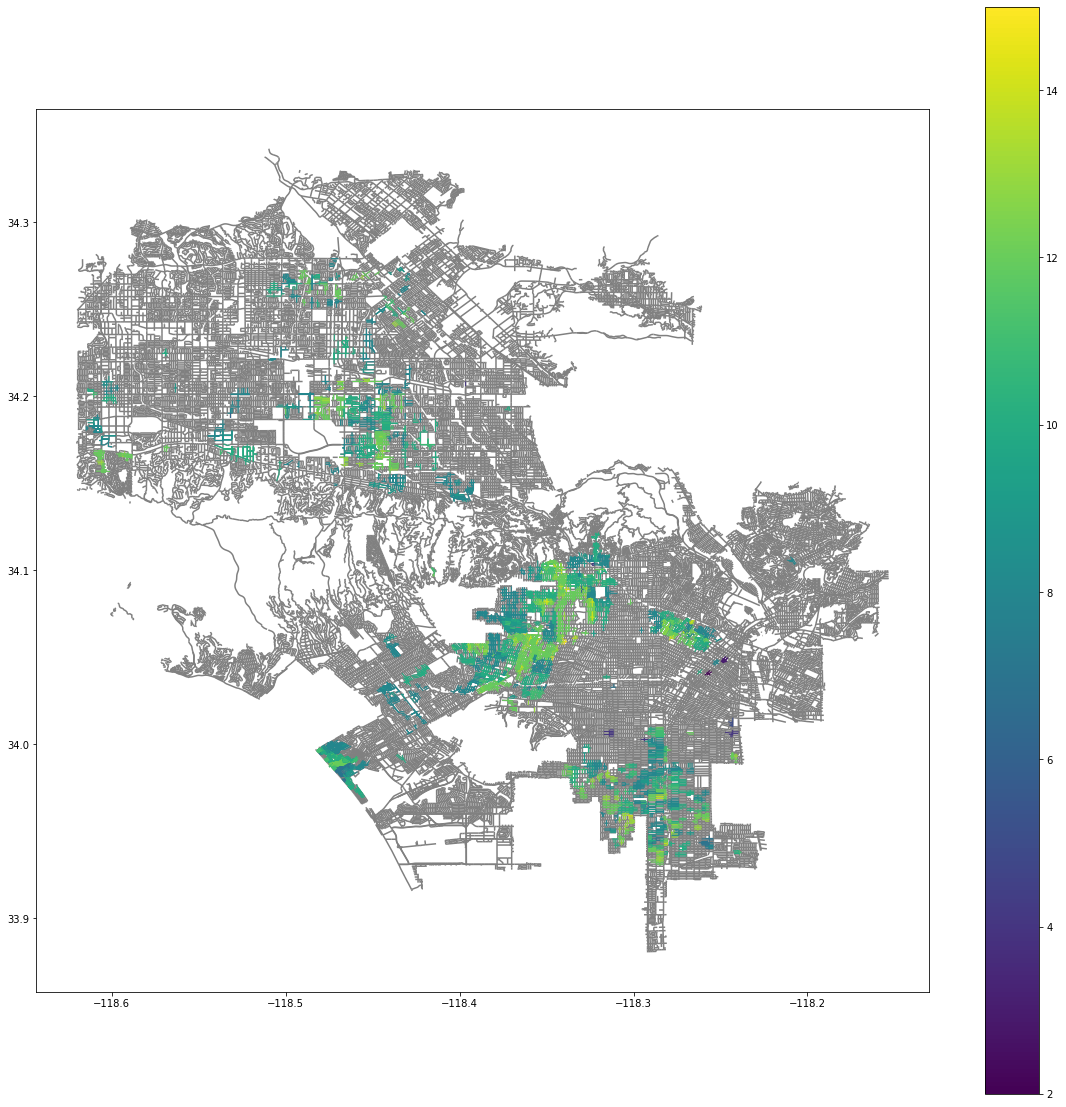

In [28]:
# Plot street sweeping on Monday in city of LA 
plot_streets_mo(34.18, -118.32, zoom=0.3, column='Hour', linewidth=1)

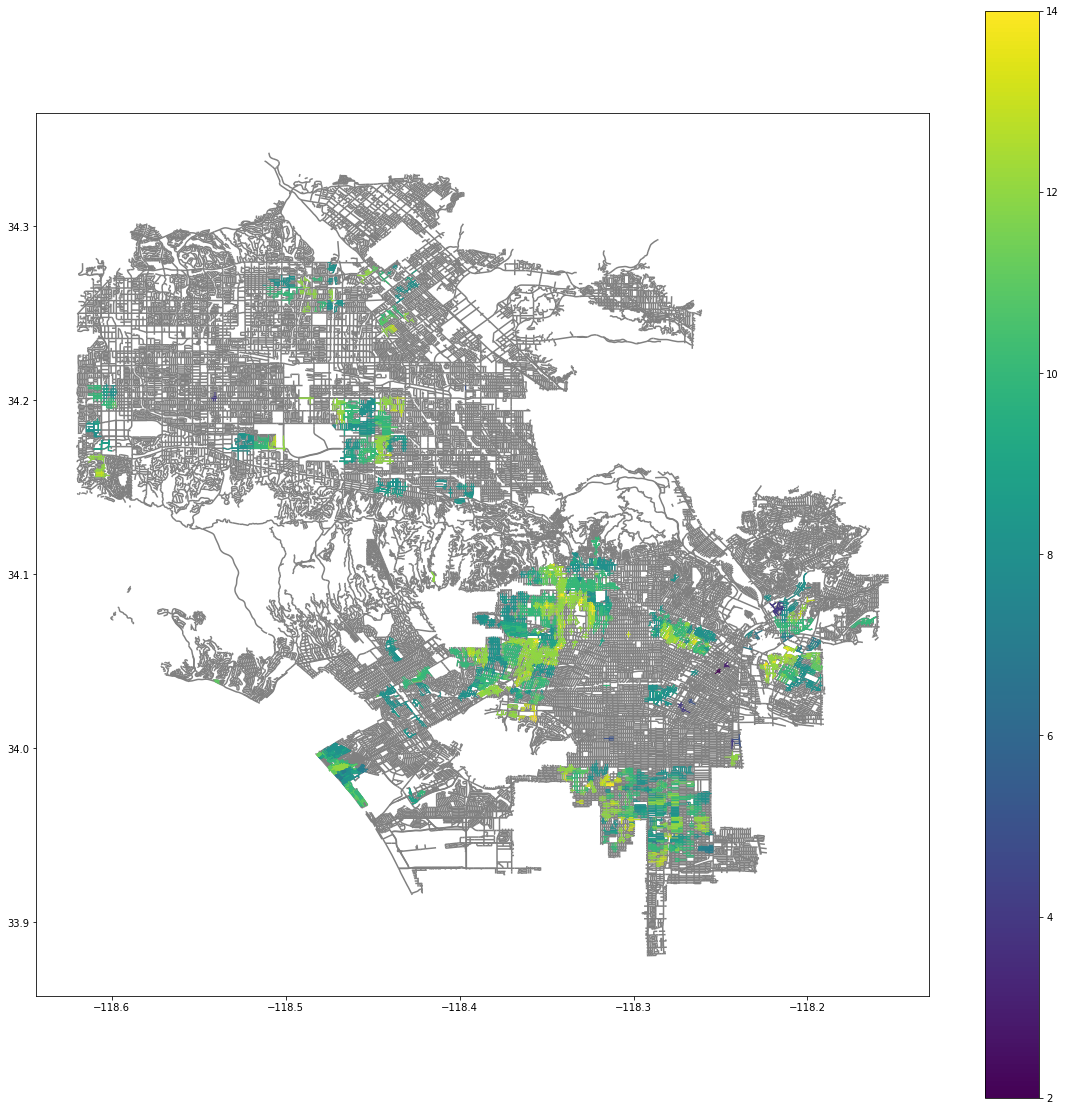

In [60]:
## Plot street sweeping on Tuesday in city of LA 
plot_streets_tu(34.18, -118.32, zoom=0.3, column='Hour', linewidth=1)

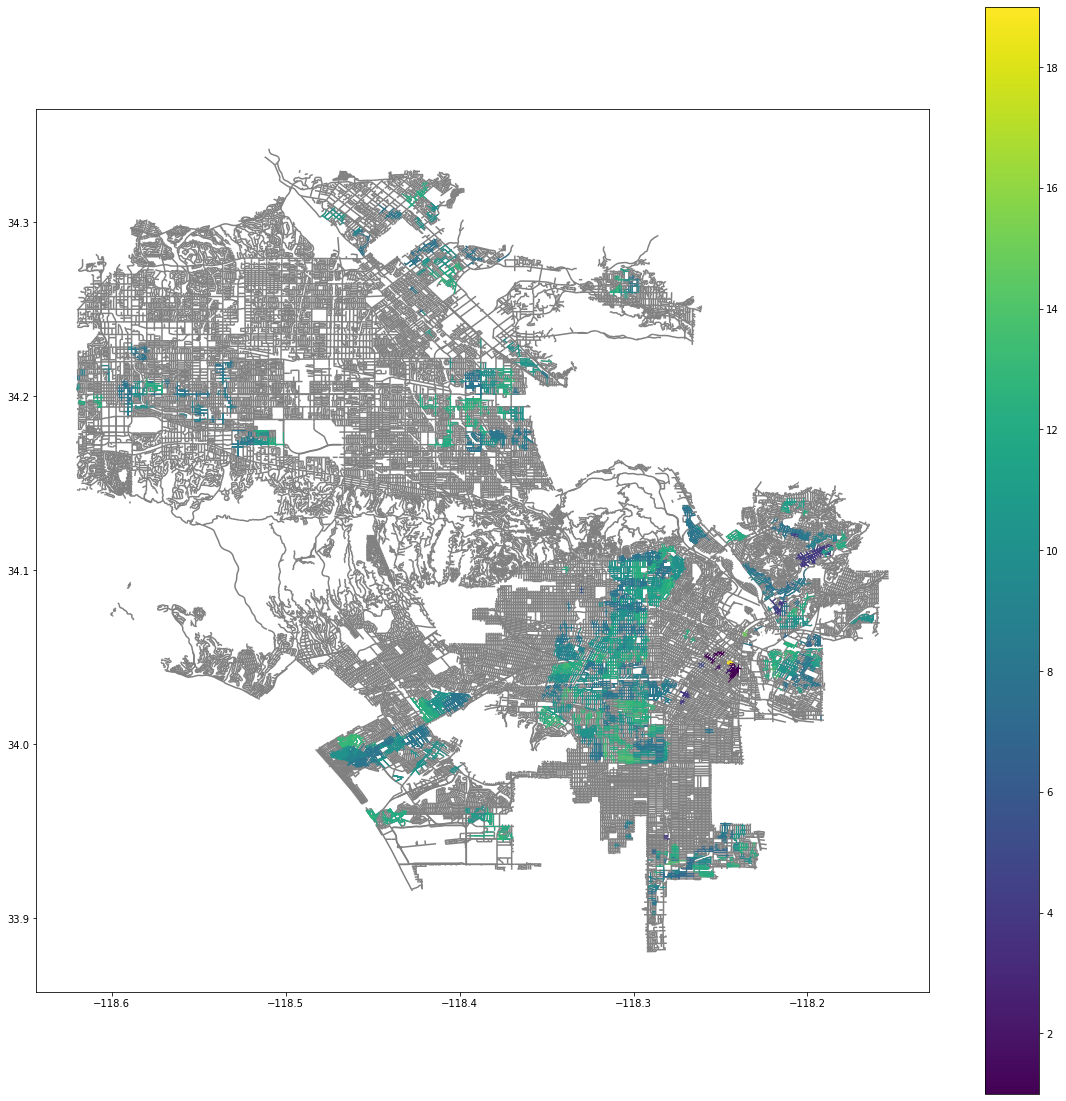

In [61]:
# Plot street sweeping on Wednesday in city of LA 
plot_streets_we(34.18, -118.32, zoom=0.3, column='Hour', linewidth=1)

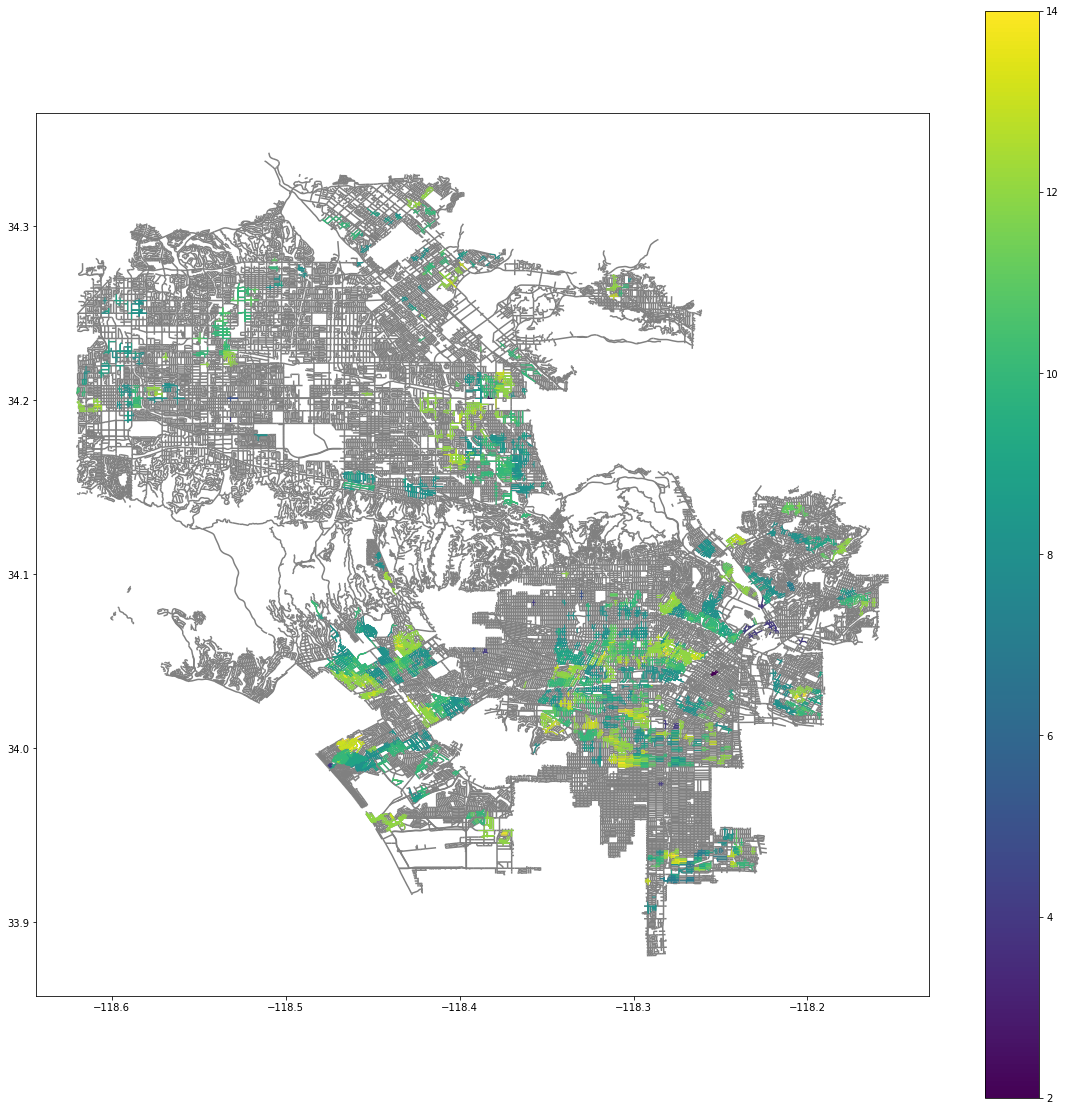

In [48]:
# Plot street sweeping on Thursday in city of LA 
plot_streets_th(34.18, -118.32, zoom=0.3, column='Hour', linewidth=1)

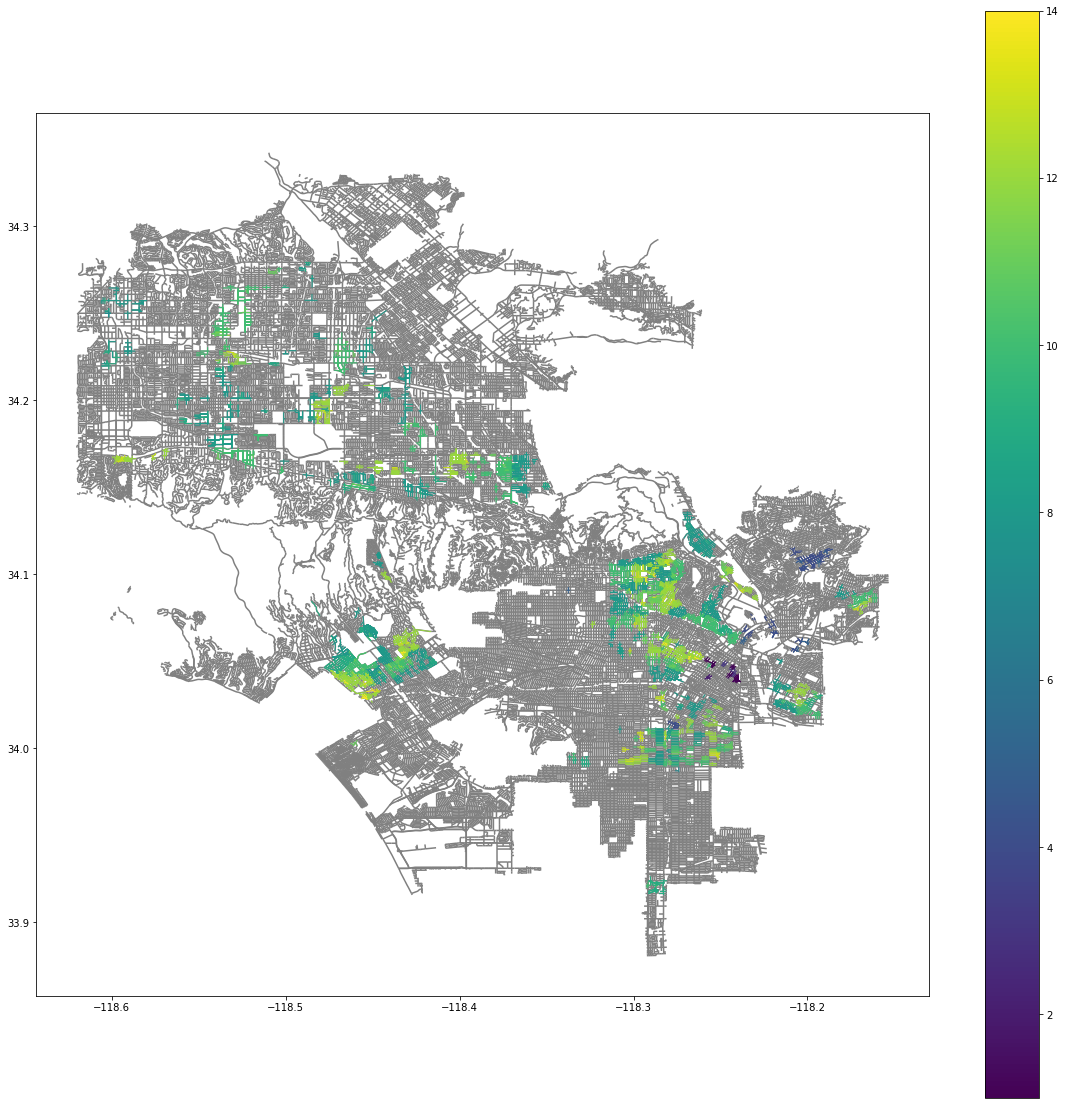

In [62]:
# Plot street sweeping on Friday in city of LA 
plot_streets_fr(34.18, -118.32, zoom=0.3, column='Hour', linewidth=1)

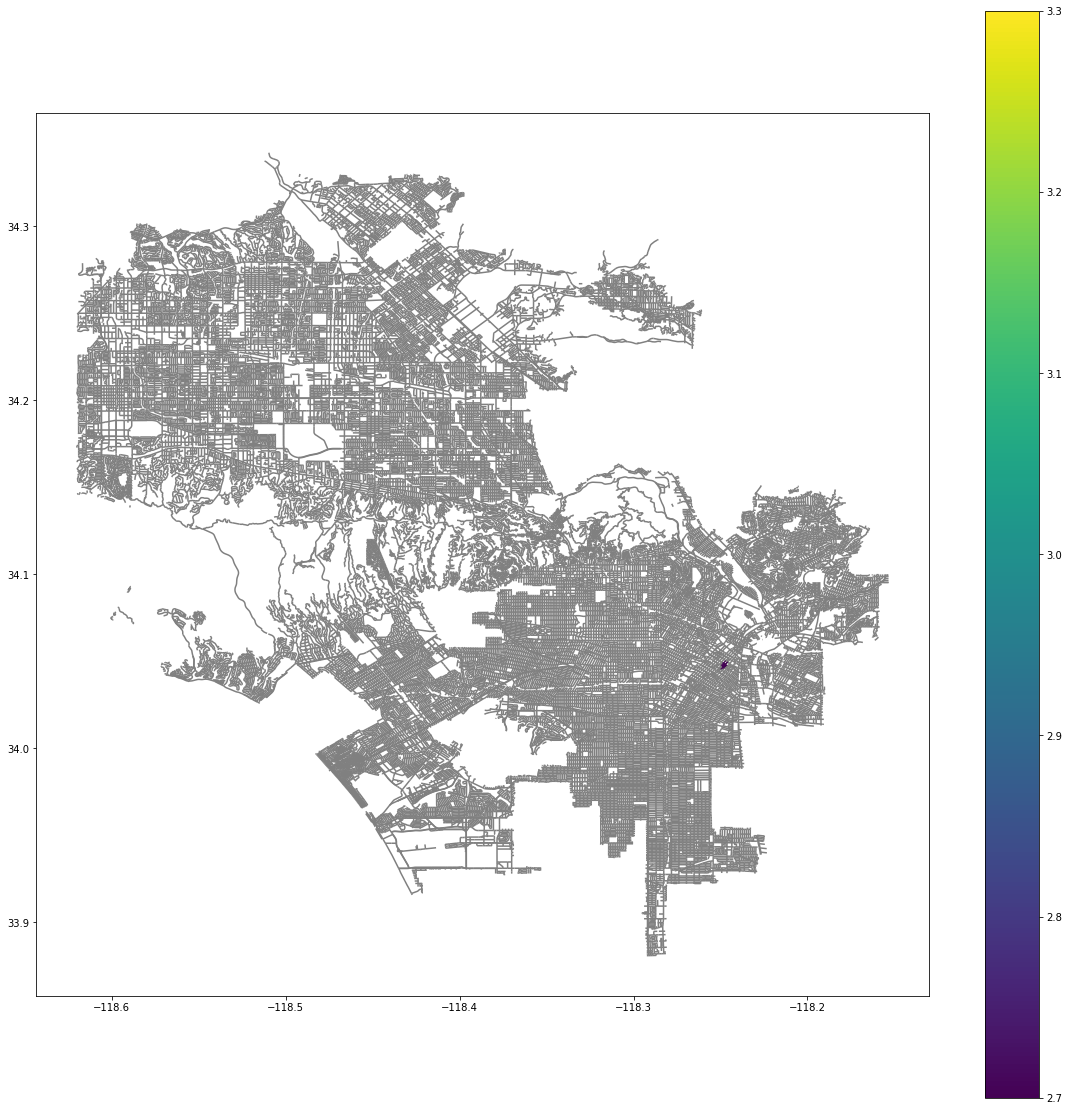

In [50]:
# Plot street sweeping on Saturday in city of LA 
plot_streets_sa(34.18, -118.32, zoom=0.3, column='Hour', linewidth=1)

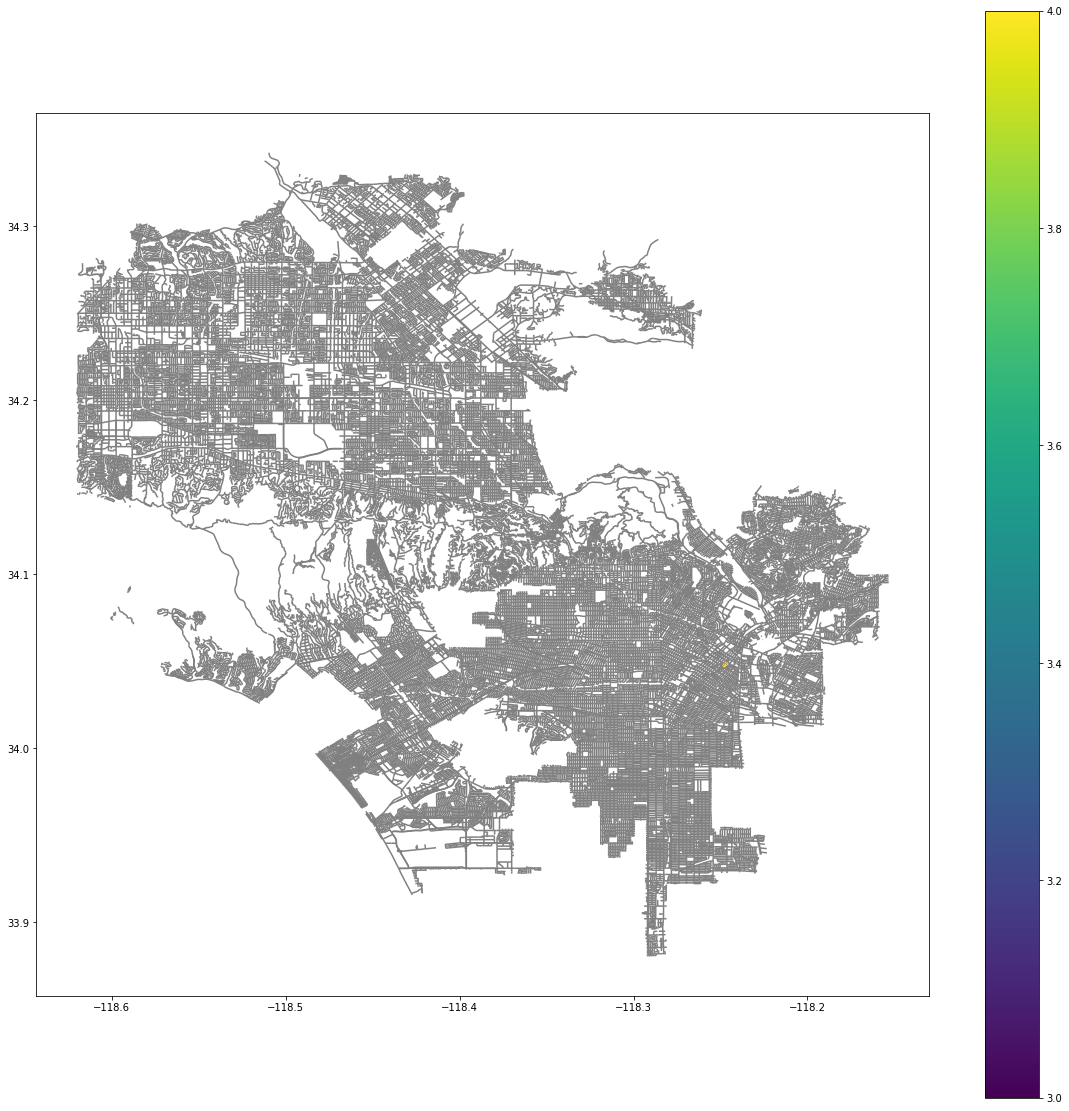

In [51]:
# Plot street sweeping on Sunday in city of LA 
plot_streets_su(34.18, -118.32, zoom=0.3, column='Hour', linewidth=1)